In this exercise, I perform multiple linear regression and determine the effects of using different subsets of predictor variables when analyzing the linear model. Then, using the residuals, I perform some diagnostics, e.g., checking the constant variance assumption, normality of errors and I look for outliers, influential points, and points with high leverage.

The data for this exercise come from the 'sat' data from the faraway R package. The sat data frame has 50 rows and 7 columns. Data were collected to study the relationship between expenditures on public education and test results.

This data frame contains the following columns:

'expend' - Current expenditure per pupil in average daily attendance in public elementary and secondary schools, 1994-95 (in thousands of dollars)

'ratio' - Average pupil/teacher ratio in public elementary and secondary schools, Fall 1994

'salary' - Estimated average annual salary of teachers in public elementary and secondary schools, 1994-95 (in thousands of dollars)

'takers' - Percentage of all eligible students taking the SAT, 1994-95 verbal Average verbal SAT score, 1994-95 math Average math SAT score, 1994-95

'total' - Average total score on the SAT, 1994-95

Source: "Getting What You Pay For: The Debate Over Equity in Public School Expenditures" D. Guber, Journal of Statistics Education, 1999

First, I perform multiple regression with the average total SAT score as the response variable and expenditure, teacher salary, pupil/teacher ratio as the predictor variables.

In [1]:
library(faraway)
data(sat)
lm <- lm(total~expend+ratio+salary, data=sat)
(lms <- summary(lm))


Call:
lm(formula = total ~ expend + ratio + salary, data = sat)

Residuals:
     Min       1Q   Median       3Q      Max 
-140.911  -46.740   -7.535   47.966  123.329 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1069.234    110.925   9.639 1.29e-12 ***
expend        16.469     22.050   0.747   0.4589    
ratio          6.330      6.542   0.968   0.3383    
salary        -8.823      4.697  -1.878   0.0667 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 68.65 on 46 degrees of freedom
Multiple R-squared:  0.2096,	Adjusted R-squared:  0.1581 
F-statistic: 4.066 on 3 and 46 DF,  p-value: 0.01209


This model seems to suggests that on average when all 3 predictor variables are taken together, for each thousand dollar increase in expenditure, total will increase by about 16.5 points, for each unit increase teacher/pupil ratio, total will increase by about 6.3 points, and for each thousand dollar increase in teacher salary, total will decrease by about 8.8 points.

In [2]:
full <- lm(total~expend+ratio+salary+takers, data=sat)
n <- length(sat$total)
p <- 5 # number of predictors including the intercept
(fulls <- summary(full))


Call:
lm(formula = total ~ expend + ratio + salary + takers, data = sat)

Residuals:
    Min      1Q  Median      3Q     Max 
-90.531 -20.855  -1.746  15.979  66.571 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1045.9715    52.8698  19.784  < 2e-16 ***
expend         4.4626    10.5465   0.423    0.674    
ratio         -3.6242     3.2154  -1.127    0.266    
salary         1.6379     2.3872   0.686    0.496    
takers        -2.9045     0.2313 -12.559 2.61e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.7 on 45 degrees of freedom
Multiple R-squared:  0.8246,	Adjusted R-squared:  0.809 
F-statistic: 52.88 on 4 and 45 DF,  p-value: < 2.2e-16


If I add takers as a predictor variable, the coefficients for all of the predictor variables change.
The new model suggest that on average when all 4 predictor variables are taken together, for each thousand dollar increase in expenditure, total will increase by about 4.5 points, for each unit increase teacher/pupil ratio, total will decrease by about 3.6 points, for each thousand dollar increase in teacher salary, total will increase by about 1.6  points, and for each percent increase in takers, total will decrease by about 2.9 points.

In the next part of this exercise, I use the 'full' model to perform 2 hypothesis tests to test the existence of a linear relationship between 1 or more predictor variables with the response variable using the F-test.

First, I test the hypothesis that the coefficient for teacher salary ($\beta_3$) = 0. I use a significance level of 0.05 for the test and also calculate the p-value of this test.

#### Hypothesis Test:

Null hypothesis $H_0: \beta_3 = 0$

vs.

Alternative hypothesis $H_A: \beta_3 ≠ 0$

In [3]:
red <- lm(total~expend+ratio+takers, data=sat)
(aov <- anova(red,full))

F <- aov[2,"F"] #Extract F-statistic
p_value <- aov[2,"Pr(>F)"] #Extract p-value

#Calculate the 97.5% quantile level for the Student t distribution with 53 df
QF <- qf(1 - 0.05/2, p-1, n-p)

(reject <- abs(F) > QF)
# Fail to reject the null hypothesis

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
1,46.00,48627.32,NA,NA,NA,NA
2,4.500000e+01,4.812390e+04,1.000000e+00,5.034276e+02,4.707483e-01,4.961632e-01


[1] FALSE

From the output above, I determine that the probability (p-value) of getting a test-statistic |F| > 0.471 is 0.496. Since my p-value is much larger than the significance level 0.05, I fail to reject the null hypothesis and conclude that there is not enough statistical evidence at the alpha = 0.05 significance level to suggest that $\beta_3 ≠ 0$.

Next, I test the hypothesis that the coefficients for teacher salary, teacher/pupil ratio and expenditure are all 0

#### Hypothesis Test:
Null hypothesis $H_0: \beta_1  = \beta_2 = \beta_3 = 0$

vs.

Alternative hypothesis $H_A$: At least one $\beta_j$ ≠ 0 (for j = 1, 2, 3)

In [4]:
red2 <- lm(total~takers, data=sat)
(aov2 <- anova(red2,full))

F <- aov2[2,"F"] #Extract F-statistic
p_value <- aov2[2,"Pr(>F)"] #Extract p-value

(reject <- abs(F) > QF)
# We reject the null hypothesis

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
1,48.00,58433.15,NA,NA,NA,NA
2,4.500000e+01,4.812390e+04,3.000000e+00,1.030925e+04,3.213347e+00,3.164874e-02


[1] TRUE

The output shows F = 3.2 (p-value = 3.16e-02 or 0.0316). Thus, I reject the null hypothesis at the $\alpha$ = 0.05 significance level and conclude that at least one $\beta_j$ ≠ 0 (for j = 1, 2, 3).

In the last part of this exercise, I perform some diagnostics, e.g., check the constant variance assumption, normality of errors using the residuals in the full model.

In [5]:
Yhat <- full$fitted
resids <- full$residuals
(top5 <- tail(sort(abs(resids)),5)) #Top 5 points with residuals farthest from 0
which(abs(resids) > 90)

Nevada          Utah New Hampshire  North Dakota West Virginia 
     54.14945      65.76608      65.86530      66.57129      90.53142

West Virginia 
           48

West Virginia by far has the largest residual, so I highlight WV as a bold, red circle in each residual plot.

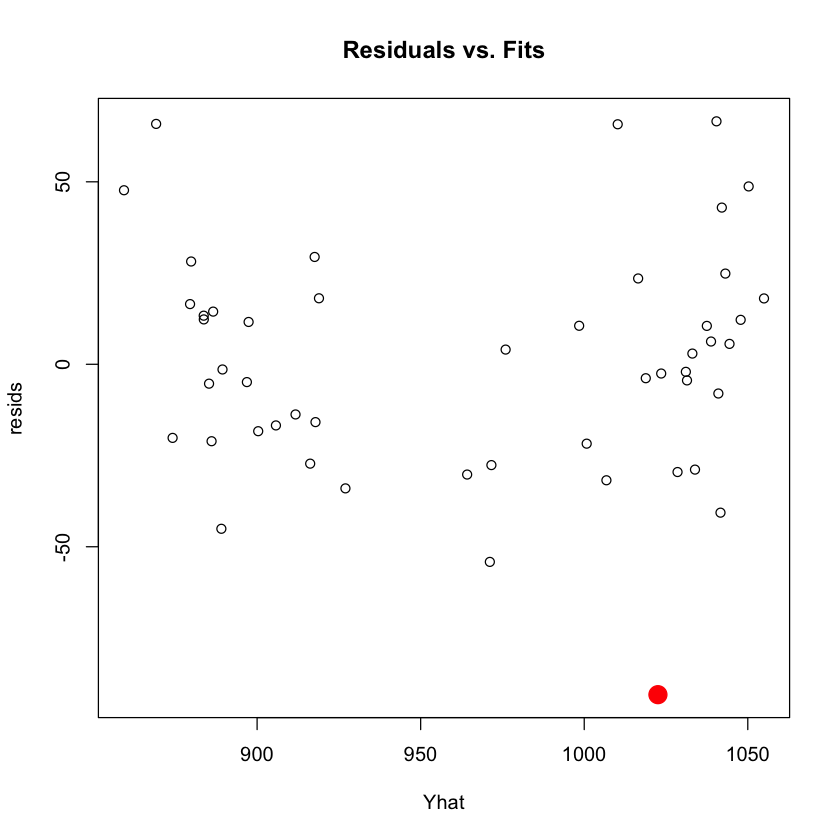

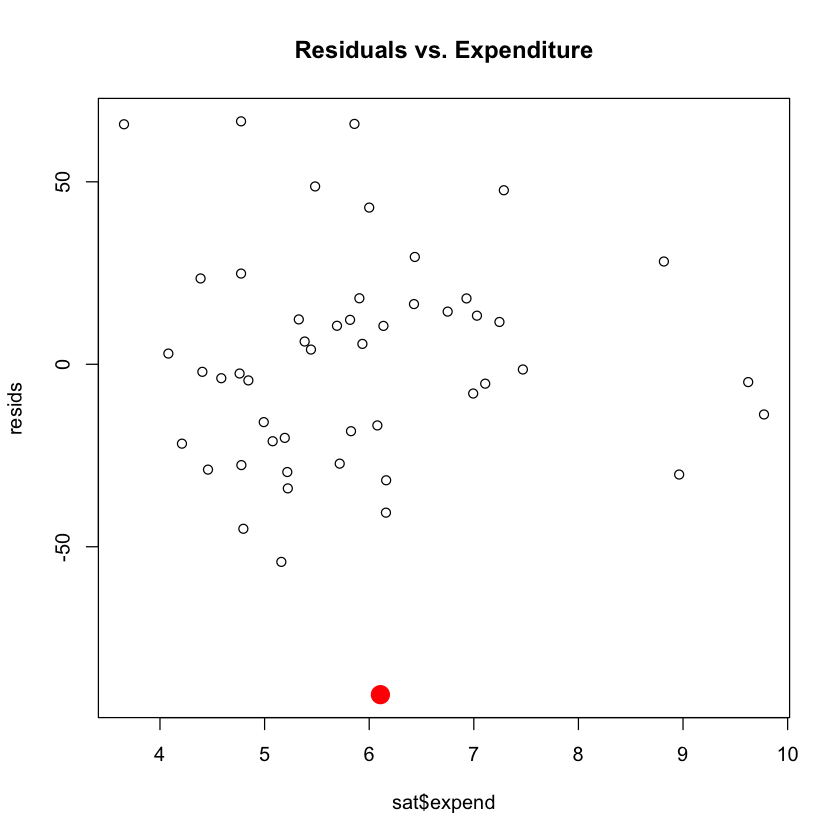

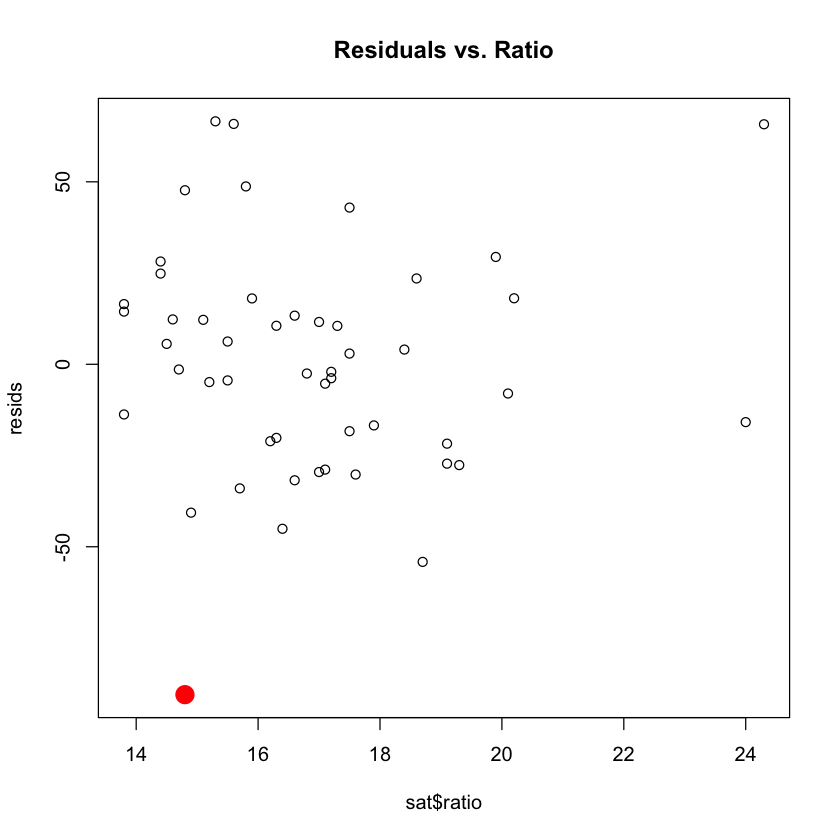

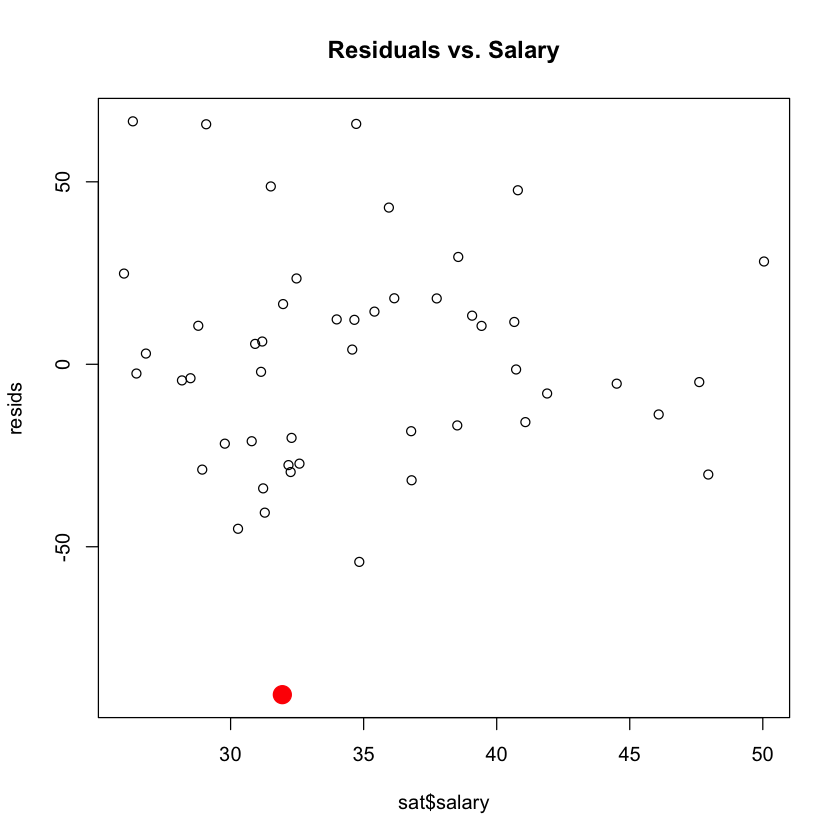

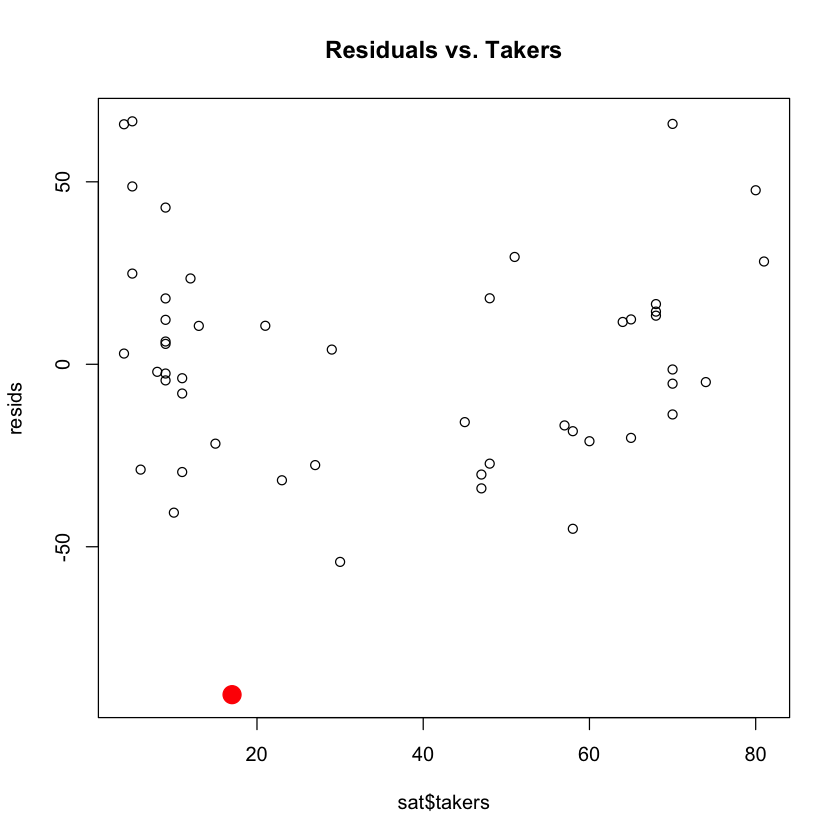

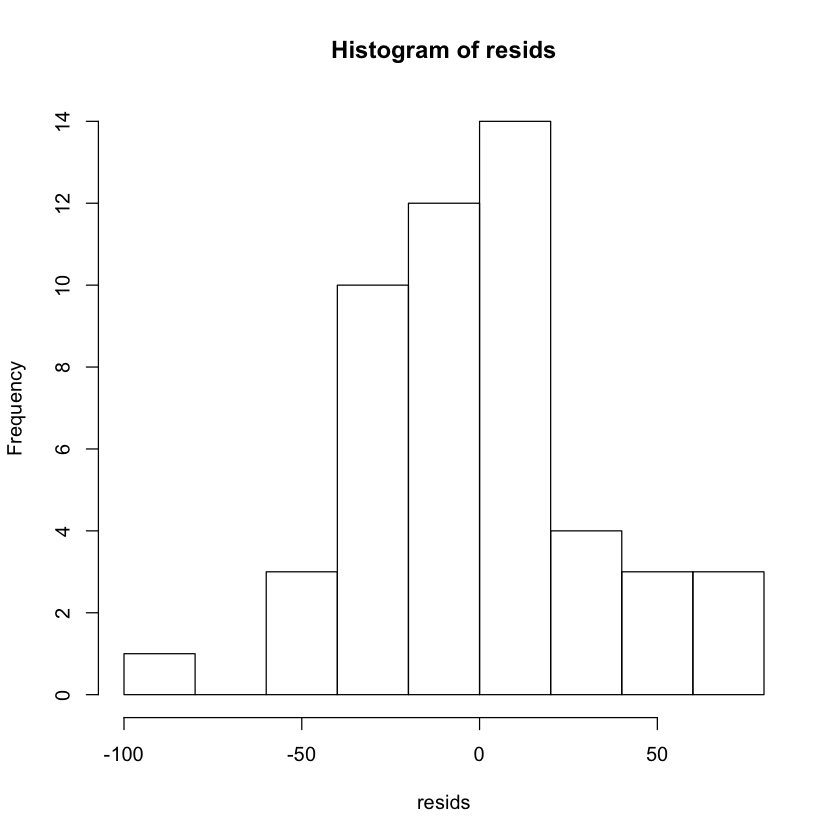

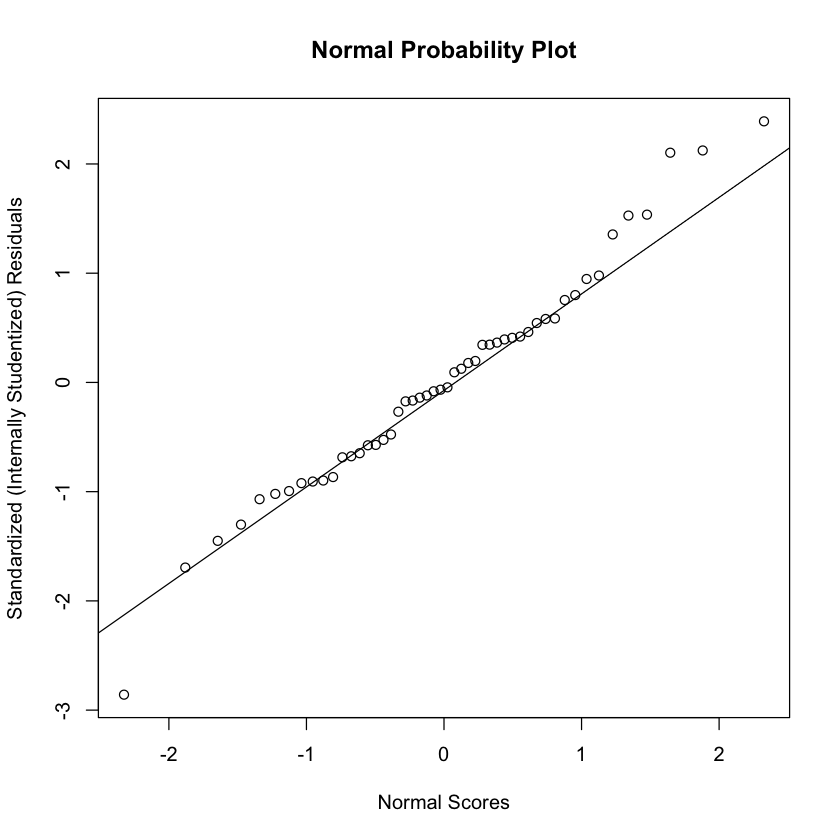

In [6]:
plot(Yhat, resids,
     col=ifelse(resids==resids[48], "red", "black"),
     pch=ifelse(resids==resids[48], 19, 1),
     cex=ifelse(resids==resids[48], 2, 1),
     main='Residuals vs. Fits')

plot(sat$expend, resids,
     col=ifelse(resids==resids[48], "red", "black"),
     pch=ifelse(resids==resids[48], 19, 1),
     cex=ifelse(resids==resids[48], 2, 1),
     main = 'Residuals vs. Expenditure')

plot(sat$ratio, resids,
     col=ifelse(resids==resids[48], "red", "black"),
     pch=ifelse(resids==resids[48], 19, 1),
     cex=ifelse(resids==resids[48], 2, 1),
     main = 'Residuals vs. Ratio')

plot(sat$salary, resids,
     col=ifelse(resids==resids[48], "red", "black"),
     pch=ifelse(resids==resids[48], 19, 1),
     cex=ifelse(resids==resids[48], 2, 1),
     main = 'Residuals vs. Salary')

plot(sat$takers, resids,
     col=ifelse(resids==resids[48], "red", "black"),
     pch=ifelse(resids==resids[48], 19, 1),
     cex=ifelse(resids==resids[48], 2, 1),
     main = 'Residuals vs. Takers')

hist(resids)

stdres = rstandard(full)
qqnorm(stdres, ylab="Standardized (Internally Studentized) Residuals", xlab="Normal Scores", main="Normal Probability Plot") 
qqline(stdres)

All of the residual plots indicate that the average of the residuals remains close to 0, which affirms linearity and the spread of the residuals remains approximately random, affirming constant variance.

Also, after looking at the histogram of residuals and the Normal Probability plot, there is little evidence to suggest violation of the normality assumption.

Below, I use both internally-studentized residuals (or standardized residuals) and externally-studentized residuals (or studentized deleted residuals) to find outliers.

Generally, if an observation has an internally-studentized residual larger than 3 (in absolute value), it is deemed  an outlier.

Externally-studentized residuals are going to be more effective for detecting outlying Y observations than standardized residuals. Generally, if an observation has an externally-studentized residual that is larger than 3 (in absolute value) we can call it an outlier.

In [7]:
stdres[which(abs(stdres) > 2)]

stud.del.resids = rstudent(full)
stud.del.resids[which(abs(stud.del.resids) > 2)]

New Hampshire  North Dakota          Utah West Virginia 
     2.103095      2.123567      2.390264     -2.858505

New Hampshire  North Dakota          Utah West Virginia 
     2.190006      2.213686      2.529587     -3.124428

In the output above, for both internally and externally studentized residuals, WV has the largest residual, followed by UT. NH and ND also have relatively high residuals, but after analyzing these residuals and observing the residuals plots from before, I consider WV to be the only outlier.

,expend,ratio,salary,takers,verbal,math,total
California,4.992,24.000,41.078,45.000,417.000,485.000,902.000
Utah,3.656,24.300,29.082,4.000,513.000,563.000,1076.000


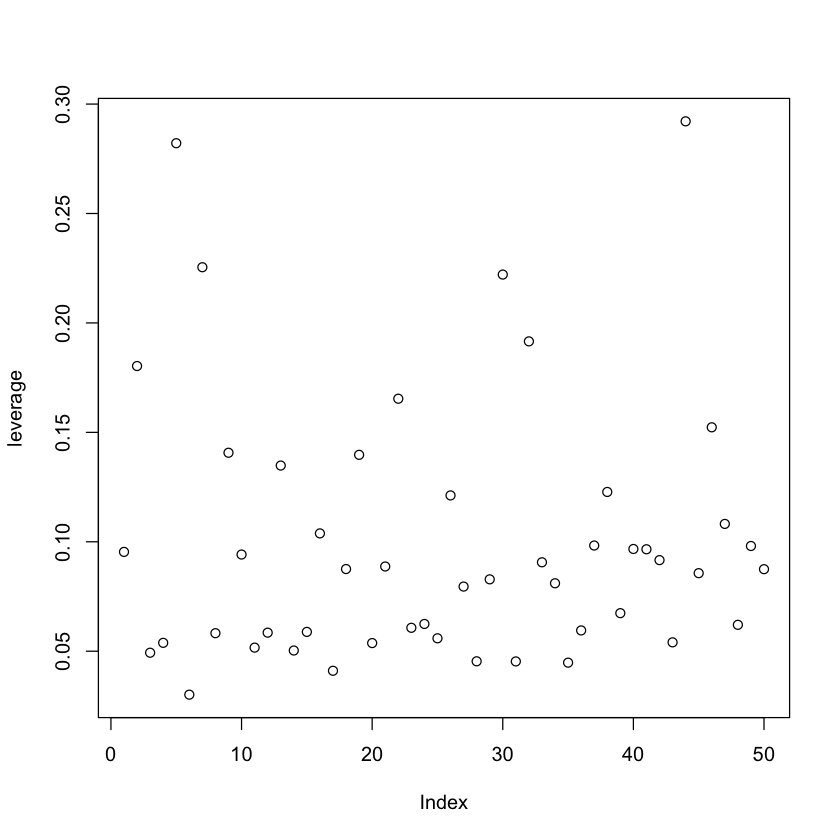

In [8]:
leverage = hat(model.matrix(full))
plot(leverage)
sat[leverage >0.25,]

The points with the highest leverage are California and Utah.

Utah 
  44

[1] 0.7385489

Utah 
  44

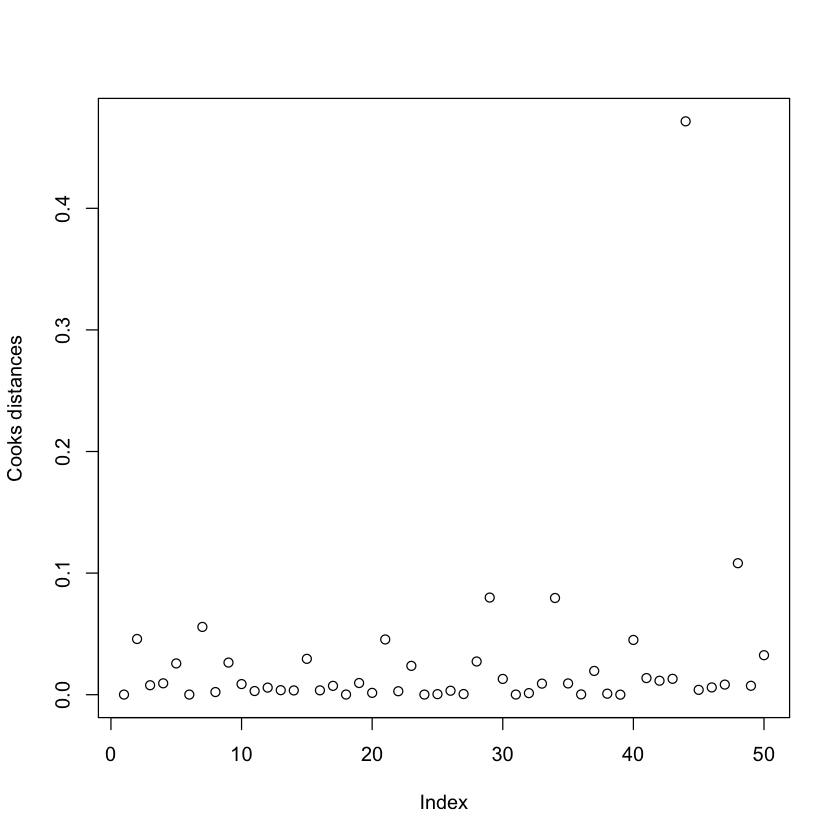

In [9]:
cook = cooks.distance(full)
plot(cook,ylab="Cooks distances")
which(cook > 0.4)

(fits <- 2 * sqrt((p + 1) / (n - p - 1)))
dfit = dffits(full)

which(dfit > fits)

Both Cook's distance and difference in fits (DFFITS) indicate that Utah is the only influential point.